### Project outline: 

- Read data into Jupyter notebook, use pandas to import data into a data frame
- Preprocess data: Explore data, check for missing data and apply data scaling. Justify the type of scaling used.
- Goal is to predict the **total transaction revenue**. 
- Decide aboute a good evaluation strategy and justify your choice.
- Split dataset into train and test dataset. 
- Choose two supervised learning model of your choice to train on train set. Use proper methods to find the best parameters. Evaluate your method on test data according to evaluation strategy. 
- Choose two unsupervised learning models, clustering, to train on your dataset. Discuss results. 
- Choose two unsupervised learning models, dimentionally reduction, and train it your dataset. Now use the same supervised learning models above on reduced dataset. Can you see any differences? Discuss the result. 
- Use a neural network model on your dataset. Compare the result with other two supervised learning models. Which model performs better? 

### Deliverables:
- Submit IPython notebook. Use markdown to provide an inline comments for this project.
- Submit only one notebook. Before submitting, make sure everything runs as expected. To check that, restart the kernel (in the menubar, select Kernel > Restart) and then run all cells (in the menubar, select Cell > Run All).
- Visualization expected. 

### Dataset Description
This is an online Merchandise Store customer dataset. Goal is to predict the total transaction revenue. 
Each row in the dataset is one visit to the store. 

Data Fields
- fullVisitorId- A unique identifier for each user of the Google Merchandise Store.
- channelGrouping - The channel via which the user came to the Store.
- date - The date on which the user visited the Store.
- device - The specifications for the device used to access the Store.
- geoNetwork - This section contains information about the geography of the user.
- sessionId - A unique identifier for this visit to the store.
- socialEngagementType - Engagement type, either "Socially Engaged" or "Not Socially Engaged".
- totals - This section contains aggregate values across the session.
- trafficSource - This section contains information about the Traffic Source from which the session originated.
- visitId - An identifier for this session. This is part of the value usually stored as the _utmb cookie. This is only unique to the user. For a completely unique ID, you should use a combination of fullVisitorId and visitId.
- visitNumber - The session number for this user. If this is the first session, then this is set to 1.
- visitStartTime - The timestamp (expressed as POSIX time).
- hits - This row and nested fields are populated for any and all types of hits. Provides a record of all page visits.
- customDimensions - This section contains any user-level or session-level custom dimensions that are set for a session. This is a repeated field and has an entry for each dimension that is set.

In [1]:
import pandas as pd
import datetime as dt
import numpy as np

In [2]:
df = pd.read_csv('data.csv',dtype={'fullVisitorId':'str'})

# Data Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
channelGrouping                   20000 non-null object
customDimensions                  20000 non-null object
date                              20000 non-null int64
device                            20000 non-null object
fullVisitorId                     20000 non-null object
geoNetwork                        20000 non-null object
hits                              20000 non-null object
socialEngagementType              20000 non-null object
trafficSource                     20000 non-null object
visitId                           20000 non-null int64
visitNumber                       20000 non-null int64
visitStartTime                    20000 non-null int64
totals_bounces                    9873 non-null float64
totals_hits                       20000 non-null int64
totals_newVisits                  15088 non-null float64
totals_pageviews                  19999 non-null float6

In [4]:
pd.options.display.float_format = '{:.0f}'.format
df.head()

,channelGrouping,customDimensions,date,device,fullVisitorId,geoNetwork,hits,socialEngagementType,trafficSource,visitId,...,totals_bounces,totals_hits,totals_newVisits,totals_pageviews,totals_sessionQualityDim,totals_timeOnSite,totals_totalTransactionRevenue,totals_transactionRevenue,totals_transactions,totals_visits
0,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",20171016,{'mobileDeviceInfo': 'not available in demo da...,3162355547410993243,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '17',...",Not Socially Engaged,"{'campaign': '(not set)', 'source': 'google', ...",1508198450,...,1,1,1,1,1,nan,nan,nan,nan,1
1,Referral,"[{'index': '4', 'value': 'North America'}]",20171016,{'mobileDeviceInfo': 'not available in demo da...,8934116514970143966,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '10',...",Not Socially Engaged,{'referralPath': '/a/google.com/transportation...,1508176307,...,nan,2,nan,2,2,28,nan,nan,nan,1
2,Direct,"[{'index': '4', 'value': 'North America'}]",20171016,{'mobileDeviceInfo': 'not available in demo da...,7992466427990357681,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '17',...",Not Socially Engaged,"{'isTrueDirect': True, 'campaign': '(not set)'...",1508201613,...,nan,2,1,2,1,38,nan,nan,nan,1
3,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",20171016,{'mobileDeviceInfo': 'not available in demo da...,9075655783635761930,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '9', ...",Not Socially Engaged,"{'campaign': '(not set)', 'source': 'google', ...",1508169851,...,nan,2,1,2,1,1,nan,nan,nan,1
4,Organic Search,"[{'index': '4', 'value': 'Central America'}]",20171016,{'mobileDeviceInfo': 'not available in demo da...,6960673291025684308,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '14',...",Not Socially Engaged,"{'campaign': '(not set)', 'source': 'google', ...",1508190552,...,nan,2,1,2,1,52,nan,nan,nan,1


In [5]:
df['date'].value_counts()

20171130    3178
20171016    2989
20160902    2613
20170126    2209
20170203    2182
20170623    2095
20180415    2089
20170312    1781
20171110     864
Name: date, dtype: int64

### Data is from just a few days in three years. So we will drop the data column

### Converting the JSON format data into flat table form and then replacing the JSON columns with flat tables

In [6]:
df['customDimensions'] = [val[0]['value'] if val else np.nan for val in df['customDimensions'].apply(eval)]

In [7]:
df.head()

,channelGrouping,customDimensions,date,device,fullVisitorId,geoNetwork,hits,socialEngagementType,trafficSource,visitId,...,totals_bounces,totals_hits,totals_newVisits,totals_pageviews,totals_sessionQualityDim,totals_timeOnSite,totals_totalTransactionRevenue,totals_transactionRevenue,totals_transactions,totals_visits
0,Organic Search,EMEA,20171016,{'mobileDeviceInfo': 'not available in demo da...,3162355547410993243,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '17',...",Not Socially Engaged,"{'campaign': '(not set)', 'source': 'google', ...",1508198450,...,1,1,1,1,1,nan,nan,nan,nan,1
1,Referral,North America,20171016,{'mobileDeviceInfo': 'not available in demo da...,8934116514970143966,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '10',...",Not Socially Engaged,{'referralPath': '/a/google.com/transportation...,1508176307,...,nan,2,nan,2,2,28,nan,nan,nan,1
2,Direct,North America,20171016,{'mobileDeviceInfo': 'not available in demo da...,7992466427990357681,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '17',...",Not Socially Engaged,"{'isTrueDirect': True, 'campaign': '(not set)'...",1508201613,...,nan,2,1,2,1,38,nan,nan,nan,1
3,Organic Search,EMEA,20171016,{'mobileDeviceInfo': 'not available in demo da...,9075655783635761930,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '9', ...",Not Socially Engaged,"{'campaign': '(not set)', 'source': 'google', ...",1508169851,...,nan,2,1,2,1,1,nan,nan,nan,1
4,Organic Search,Central America,20171016,{'mobileDeviceInfo': 'not available in demo da...,6960673291025684308,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '14',...",Not Socially Engaged,"{'campaign': '(not set)', 'source': 'google', ...",1508190552,...,nan,2,1,2,1,52,nan,nan,nan,1


### customDimensions column is converted as seen above

### Transforming device column

In [8]:
df_device = pd.io.json.json_normalize(df['device'].apply(eval))
df_device.shape

(20000, 16)

### Checking for columns with no valuable data

In [9]:
df_device_value_counts = pd.DataFrame([df_device.iloc[:,i].value_counts() for i in range(len(df_device.columns))])
df_device_value_counts

,Chrome,Safari,Firefox,Internet Explorer,Android Webview,Edge,Opera Mini,Safari (in-app),Samsung Internet,Opera,...,Chrome OS,(not set),Windows Phone,Tizen,Samsung,Xbox,OS/2,Firefox OS,Nintendo Wii,Playstation Vita
browser,13978,3340,829,530,300,267,191,139,137,134,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
browserSize,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
browserVersion,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
deviceCategory,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
flashVersion,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
isMobile,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
language,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
mobileDeviceBranding,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
mobileDeviceInfo,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
mobileDeviceMarketingName,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [10]:
na_columns = pd.DataFrame(df_device_value_counts['not available in demo dataset'])
na_columns

,not available in demo dataset
browser,nan
browserSize,20000
browserVersion,20000
deviceCategory,nan
flashVersion,20000
isMobile,nan
language,20000
mobileDeviceBranding,20000
mobileDeviceInfo,20000
mobileDeviceMarketingName,20000


### A lot of columns have "not available in demo dataset" in all the rows as the row count is 20000, which is the total number of rows in the dataset.

### Exctracting those columns and removing from data

In [11]:
na_columns_names = na_columns[na_columns['not available in demo dataset']==20000].index
na_columns_names

Index(['browserSize', 'browserVersion', 'flashVersion', 'language',
       'mobileDeviceBranding', 'mobileDeviceInfo', 'mobileDeviceMarketingName',
       'mobileDeviceModel', 'mobileInputSelector', 'operatingSystemVersion',
       'screenColors', 'screenResolution'],
      dtype='object')

In [12]:
df_device.drop(columns=na_columns_names,inplace=True)

In [13]:
df_device.head()

,browser,deviceCategory,isMobile,operatingSystem
0,Firefox,desktop,False,Windows
1,Chrome,desktop,False,Chrome OS
2,Chrome,mobile,True,Android
3,Chrome,desktop,False,Windows
4,Chrome,desktop,False,Windows


### Keeping all columns for now

### Inserting these columns in the main df and deleting device column

In [14]:
for i in range(len(df_device.columns)):
    df.insert(column=df_device.iloc[:,i].name,loc=i+3,value = df_device.iloc[:,i])

In [15]:
df.drop('device',axis=1,inplace=True)

In [16]:
df.head()

,channelGrouping,customDimensions,date,browser,deviceCategory,isMobile,operatingSystem,fullVisitorId,geoNetwork,hits,...,totals_bounces,totals_hits,totals_newVisits,totals_pageviews,totals_sessionQualityDim,totals_timeOnSite,totals_totalTransactionRevenue,totals_transactionRevenue,totals_transactions,totals_visits
0,Organic Search,EMEA,20171016,Firefox,desktop,False,Windows,3162355547410993243,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '17',...",...,1,1,1,1,1,nan,nan,nan,nan,1
1,Referral,North America,20171016,Chrome,desktop,False,Chrome OS,8934116514970143966,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '10',...",...,nan,2,nan,2,2,28,nan,nan,nan,1
2,Direct,North America,20171016,Chrome,mobile,True,Android,7992466427990357681,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '17',...",...,nan,2,1,2,1,38,nan,nan,nan,1
3,Organic Search,EMEA,20171016,Chrome,desktop,False,Windows,9075655783635761930,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '9', ...",...,nan,2,1,2,1,1,nan,nan,nan,1
4,Organic Search,Central America,20171016,Chrome,desktop,False,Windows,6960673291025684308,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '14',...",...,nan,2,1,2,1,52,nan,nan,nan,1


### Flattening the geoNetwork column

In [17]:
df_geo = pd.io.json.json_normalize(df['geoNetwork'].apply(eval))
df_geo.head()

,city,cityId,continent,country,latitude,longitude,metro,networkDomain,networkLocation,region,subContinent
0,not available in demo dataset,not available in demo dataset,Europe,Germany,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,Western Europe
1,Cupertino,not available in demo dataset,Americas,United States,not available in demo dataset,not available in demo dataset,San Francisco-Oakland-San Jose CA,(not set),not available in demo dataset,California,Northern America
2,not available in demo dataset,not available in demo dataset,Americas,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,windjammercable.net,not available in demo dataset,not available in demo dataset,Northern America
3,not available in demo dataset,not available in demo dataset,Asia,Turkey,not available in demo dataset,not available in demo dataset,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,Western Asia
4,not available in demo dataset,not available in demo dataset,Americas,Mexico,not available in demo dataset,not available in demo dataset,not available in demo dataset,prod-infinitum.com.mx,not available in demo dataset,not available in demo dataset,Central America


### Splitting columns by value counts

In [18]:
df_geo_value_counts = pd.DataFrame([df_geo.iloc[:,i].value_counts() for i in range(len(df_geo.columns))])
df_geo_value_counts

,not available in demo dataset,Mountain View,(not set),New York,San Francisco,Sunnyvale,London,Los Angeles,San Jose,Chicago,...,Australasia,Northern Africa,Southern Africa,Eastern Africa,Western Africa,Caribbean,Central Asia,Middle Africa,Micronesian Region,Melanesia
city,11342,942,749,584,455,305,278,248,213,155,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
cityId,20000,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
continent,nan,nan,21,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
country,nan,nan,21,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
latitude,20000,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
longitude,20000,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
metro,11342,nan,4020,nan,nan,nan,278,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
networkDomain,nan,nan,5849,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
networkLocation,20000,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
region,11342,nan,568,584,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


### Four columns have "not avilable..." in all rows. These columns will be dropped.

In [19]:
na_geo_columns = pd.DataFrame(df_geo_value_counts['not available in demo dataset'])
na_geo_columns

,not available in demo dataset
city,11342
cityId,20000
continent,nan
country,nan
latitude,20000
longitude,20000
metro,11342
networkDomain,nan
networkLocation,20000
region,11342


In [20]:
na_geo_columns_names = na_geo_columns[na_geo_columns['not available in demo dataset']==20000].index
na_geo_columns_names

Index(['cityId', 'latitude', 'longitude', 'networkLocation'], dtype='object')

In [21]:
df_geo.drop(na_geo_columns_names,axis=1,inplace=True)

In [22]:
df_geo.head()

,city,continent,country,metro,networkDomain,region,subContinent
0,not available in demo dataset,Europe,Germany,not available in demo dataset,(not set),not available in demo dataset,Western Europe
1,Cupertino,Americas,United States,San Francisco-Oakland-San Jose CA,(not set),California,Northern America
2,not available in demo dataset,Americas,United States,not available in demo dataset,windjammercable.net,not available in demo dataset,Northern America
3,not available in demo dataset,Asia,Turkey,not available in demo dataset,unknown.unknown,not available in demo dataset,Western Asia
4,not available in demo dataset,Americas,Mexico,not available in demo dataset,prod-infinitum.com.mx,not available in demo dataset,Central America


### Removing data values which do not hold any valuable information like "not available..."

In [23]:
df_geo.replace(to_replace=['not available in demo dataset','(not set)'],value=np.nan,inplace=True)

In [24]:
df_geo.head()

,city,continent,country,metro,networkDomain,region,subContinent
0,NaN,Europe,Germany,NaN,NaN,NaN,Western Europe
1,Cupertino,Americas,United States,San Francisco-Oakland-San Jose CA,NaN,California,Northern America
2,NaN,Americas,United States,NaN,windjammercable.net,NaN,Northern America
3,NaN,Asia,Turkey,NaN,unknown.unknown,NaN,Western Asia
4,NaN,Americas,Mexico,NaN,prod-infinitum.com.mx,NaN,Central America


In [25]:
df_geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
city             7909 non-null object
continent        19979 non-null object
country          19979 non-null object
metro            4638 non-null object
networkDomain    14151 non-null object
region           8090 non-null object
subContinent     19979 non-null object
dtypes: object(7)
memory usage: 1.1+ MB


### Only country column will be used as it gives us enough information about location

In [26]:
df_geo = df_geo['country']

### Inserting df_geo to main df

In [27]:
df.head()

,channelGrouping,customDimensions,date,browser,deviceCategory,isMobile,operatingSystem,fullVisitorId,geoNetwork,hits,...,totals_bounces,totals_hits,totals_newVisits,totals_pageviews,totals_sessionQualityDim,totals_timeOnSite,totals_totalTransactionRevenue,totals_transactionRevenue,totals_transactions,totals_visits
0,Organic Search,EMEA,20171016,Firefox,desktop,False,Windows,3162355547410993243,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '17',...",...,1,1,1,1,1,nan,nan,nan,nan,1
1,Referral,North America,20171016,Chrome,desktop,False,Chrome OS,8934116514970143966,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '10',...",...,nan,2,nan,2,2,28,nan,nan,nan,1
2,Direct,North America,20171016,Chrome,mobile,True,Android,7992466427990357681,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '17',...",...,nan,2,1,2,1,38,nan,nan,nan,1
3,Organic Search,EMEA,20171016,Chrome,desktop,False,Windows,9075655783635761930,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '9', ...",...,nan,2,1,2,1,1,nan,nan,nan,1
4,Organic Search,Central America,20171016,Chrome,desktop,False,Windows,6960673291025684308,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '14',...",...,nan,2,1,2,1,52,nan,nan,nan,1


In [28]:
df.insert(column=df_geo.name, value =df_geo, loc=8)

In [29]:
df.head().iloc[:,:15]

,channelGrouping,customDimensions,date,browser,deviceCategory,isMobile,operatingSystem,fullVisitorId,country,geoNetwork,hits,socialEngagementType,trafficSource,visitId,visitNumber
0,Organic Search,EMEA,20171016,Firefox,desktop,False,Windows,3162355547410993243,Germany,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '17',...",Not Socially Engaged,"{'campaign': '(not set)', 'source': 'google', ...",1508198450,1
1,Referral,North America,20171016,Chrome,desktop,False,Chrome OS,8934116514970143966,United States,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '10',...",Not Socially Engaged,{'referralPath': '/a/google.com/transportation...,1508176307,6
2,Direct,North America,20171016,Chrome,mobile,True,Android,7992466427990357681,United States,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '17',...",Not Socially Engaged,"{'isTrueDirect': True, 'campaign': '(not set)'...",1508201613,1
3,Organic Search,EMEA,20171016,Chrome,desktop,False,Windows,9075655783635761930,Turkey,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '9', ...",Not Socially Engaged,"{'campaign': '(not set)', 'source': 'google', ...",1508169851,1
4,Organic Search,Central America,20171016,Chrome,desktop,False,Windows,6960673291025684308,Mexico,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '14',...",Not Socially Engaged,"{'campaign': '(not set)', 'source': 'google', ...",1508190552,1


### Dropping geoNetwork column

In [30]:
df.drop('geoNetwork',axis = 1,inplace=True)

In [31]:
df.head()

,channelGrouping,customDimensions,date,browser,deviceCategory,isMobile,operatingSystem,fullVisitorId,country,hits,...,totals_bounces,totals_hits,totals_newVisits,totals_pageviews,totals_sessionQualityDim,totals_timeOnSite,totals_totalTransactionRevenue,totals_transactionRevenue,totals_transactions,totals_visits
0,Organic Search,EMEA,20171016,Firefox,desktop,False,Windows,3162355547410993243,Germany,"[{'hitNumber': '1', 'time': '0', 'hour': '17',...",...,1,1,1,1,1,nan,nan,nan,nan,1
1,Referral,North America,20171016,Chrome,desktop,False,Chrome OS,8934116514970143966,United States,"[{'hitNumber': '1', 'time': '0', 'hour': '10',...",...,nan,2,nan,2,2,28,nan,nan,nan,1
2,Direct,North America,20171016,Chrome,mobile,True,Android,7992466427990357681,United States,"[{'hitNumber': '1', 'time': '0', 'hour': '17',...",...,nan,2,1,2,1,38,nan,nan,nan,1
3,Organic Search,EMEA,20171016,Chrome,desktop,False,Windows,9075655783635761930,Turkey,"[{'hitNumber': '1', 'time': '0', 'hour': '9', ...",...,nan,2,1,2,1,1,nan,nan,nan,1
4,Organic Search,Central America,20171016,Chrome,desktop,False,Windows,6960673291025684308,Mexico,"[{'hitNumber': '1', 'time': '0', 'hour': '14',...",...,nan,2,1,2,1,52,nan,nan,nan,1


### Treating Hits column

In [32]:
def todict(dic, key, value):
    if key in dic:
        dic[key].append(value)
    else:
        dic[key] = [value]
    return dic

def resolve_json(hitsdic, hits_json, key='NoneName'):
    if type(hits_json) == list:
        if len(hits_json) == 0:
            pass
        else:
            for subjson in hits_json:
                hitsdic = resolve_json(hitsdic, subjson)
    elif type(hits_json) == dict:
        for i in hits_json.keys():
            hitsdic = resolve_json(hitsdic, hits_json[i],i)
    else:
        hitsdic = todict(hitsdic, key, hits_json)
    return hitsdic

def complex_replace(x):
    dic = {}
    return resolve_json(dic, pd.io.json.loads(x.replace('\'','\"'). \
                                        replace('TRUE','true'). \
                                        replace('True','true'). \
                                        replace('FALSE','false'). \
                                        replace('False','false'). \
                                        replace(', \"',', !&~'). \
                                        replace('\", ','!&~, '). \
                                        replace('\": ','!&~: '). \
                                        replace(': \"',': !&~'). \
                                        replace(' {\"',' {!&~'). \
                                        replace('\"}, ','!&~}, '). \
                                        replace('[{\"','[{!&~'). \
                                        replace('\"}]','!&~}]'). \
                                        replace('\"','_'). \
                                        replace('!&~','\"'). \
                                        encode('gbk','ignore'). \
                                        decode('utf-8','ignore'). \
                                        replace('\\','')))

def replace(x):
    return  pd.io.json.loads(x.replace('\'','\"').replace('False', 'false').replace('True','true'))

In [33]:
hits_columns_org = pd.io.json.json_normalize(df['hits'].apply(complex_replace))

In [34]:
hits_columns = hits_columns_org.copy()

In [35]:
hits_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 87 columns):
action_type                       19994 non-null object
affiliation                       196 non-null object
contentGroup1                     19994 non-null object
contentGroup2                     19994 non-null object
contentGroup3                     19994 non-null object
contentGroup4                     19994 non-null object
contentGroup5                     19994 non-null object
contentGroupUniqueViews1          1381 non-null object
contentGroupUniqueViews2          11814 non-null object
contentGroupUniqueViews3          1749 non-null object
currencyCode                      11914 non-null object
dataSource                        11214 non-null object
domContentLoadedTime              222 non-null object
domInteractiveTime                222 non-null object
domLatencyMetricsSample           222 non-null object
domainLookupTime                  161 non-null object
eventAc

### Removing first 20 columns as they do not provide a lot of information gain

In [36]:
del_list = hits_columns.loc[:,:'exitScreenName'].columns
hits_columns.drop(columns=del_list,inplace=True)

### Converting hasSocialReferral to boolean

In [37]:
ls=[]
for row in hits_columns['hasSocialSourceReferral'].fillna(0):
    if row != 0:
        if (row[0] == 'No'):
            ls.append(0)
        elif (row[0] == 'Yes'):
            ls.append(1)
        else:
            ls.append(np.nan)
    else:
        ls.append(np.nan)
hits_columns['hasSocialSourceReferral'] = pd.Series(ls)
del ls

### Replacing hitNumber with the count of hits

In [38]:
hits_columns['hitNumber'] = hits_columns['hitNumber'].fillna('').apply(lambda x: len(x))

In [39]:
hits_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 67 columns):
hasSocialSourceReferral           19994 non-null float64
hitNumber                         20000 non-null int64
hostname                          19994 non-null object
hour                              19994 non-null object
isClick                           3304 non-null object
isEntrance                        19993 non-null object
isExit                            19993 non-null object
isFatal                           19994 non-null object
isImpression                      11714 non-null object
isInteraction                     19994 non-null object
landingScreenName                 19994 non-null object
localProductPrice                 11752 non-null object
localProductRevenue               196 non-null object
localTransactionRevenue           193 non-null object
localTransactionShipping          194 non-null object
localTransactionTax               141 non-null object
minu

In [40]:
hits_columns['localProductPrice'].head()

0               [23990000, 24990000, 4990000, 2990000]
1    [16990000, 16990000, 16990000, 16990000, 18990...
2    [16990000, 24990000, 23990000, 16990000, 16990...
3    [1990000, 4990000, 29990000, 20990000, 1699000...
4                                               [0, 0]
Name: localProductPrice, dtype: object

### The column localProductPrice looks like contains the price of all the browsed products. This could be useful. Finding the average price of all the products browsed per visit would be a good replacement for this column.

In [41]:
print("Type of each entry of Product Price:{} \nType of each element in an entry:{}".format(type(hits_columns['localProductPrice'][0]),type(hits_columns['localProductPrice'][0][0])))

Type of each entry of Product Price:<class 'list'> 
Type of each element in an entry:<class 'str'>


In [42]:
avgProductPrice = []
for row in hits_columns['localProductPrice'].fillna(''):
    tprice=0
    for i in range(len(row)):
        tprice += int(row[i])
    if len(row)!=0:
        avgProductPrice.append(tprice/len(row))
    else:
        avgProductPrice.append(0)


In [43]:
avgProductPrice[:5]

[14240000.0, 17790000.0, 19418571.42857143, 20262727.272727273, 0.0]

In [44]:
hits_columns['localProductPrice'] = avgProductPrice

### These prices are unrealistic... possibly multiplied by a factor of one million. Dividing this column by 1000000. All other columns with price will be treated like this.

In [45]:
hits_columns['localProductPrice'] /= 1000000

In [46]:
pd.options.display.float_format = '{:.2f}'.format
hits_columns['localProductPrice'].head()

0   14.24
1   17.79
2   19.42
3   20.26
4    0.00
Name: localProductPrice, dtype: float64

In [47]:
hits_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 67 columns):
hasSocialSourceReferral           19994 non-null float64
hitNumber                         20000 non-null int64
hostname                          19994 non-null object
hour                              19994 non-null object
isClick                           3304 non-null object
isEntrance                        19993 non-null object
isExit                            19993 non-null object
isFatal                           19994 non-null object
isImpression                      11714 non-null object
isInteraction                     19994 non-null object
landingScreenName                 19994 non-null object
localProductPrice                 20000 non-null float64
localProductRevenue               196 non-null object
localTransactionRevenue           193 non-null object
localTransactionShipping          194 non-null object
localTransactionTax               141 non-null object
min

### Deleting more columns which are not useful

In [48]:
del_list = hits_columns.loc[:,'hostname':'landingScreenName'].columns.append(hits_columns.loc[:,'localProductRevenue':].columns)

In [49]:
hits_columns.drop(columns=del_list,inplace=True)

In [50]:
hits_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 3 columns):
hasSocialSourceReferral    19994 non-null float64
hitNumber                  20000 non-null int64
localProductPrice          20000 non-null float64
dtypes: float64(2), int64(1)
memory usage: 468.8 KB


In [51]:
hits_columns.head()

,hasSocialSourceReferral,hitNumber,localProductPrice
0,0.00,1,14.24
1,0.00,2,17.79
2,0.00,2,19.42
3,0.00,2,20.26
4,0.00,2,0.00


In [52]:
df.head()

,channelGrouping,customDimensions,date,browser,deviceCategory,isMobile,operatingSystem,fullVisitorId,country,hits,...,totals_bounces,totals_hits,totals_newVisits,totals_pageviews,totals_sessionQualityDim,totals_timeOnSite,totals_totalTransactionRevenue,totals_transactionRevenue,totals_transactions,totals_visits
0,Organic Search,EMEA,20171016,Firefox,desktop,False,Windows,3162355547410993243,Germany,"[{'hitNumber': '1', 'time': '0', 'hour': '17',...",...,1.00,1,1.00,1.00,1.00,nan,nan,nan,nan,1
1,Referral,North America,20171016,Chrome,desktop,False,Chrome OS,8934116514970143966,United States,"[{'hitNumber': '1', 'time': '0', 'hour': '10',...",...,nan,2,nan,2.00,2.00,28.00,nan,nan,nan,1
2,Direct,North America,20171016,Chrome,mobile,True,Android,7992466427990357681,United States,"[{'hitNumber': '1', 'time': '0', 'hour': '17',...",...,nan,2,1.00,2.00,1.00,38.00,nan,nan,nan,1
3,Organic Search,EMEA,20171016,Chrome,desktop,False,Windows,9075655783635761930,Turkey,"[{'hitNumber': '1', 'time': '0', 'hour': '9', ...",...,nan,2,1.00,2.00,1.00,1.00,nan,nan,nan,1
4,Organic Search,Central America,20171016,Chrome,desktop,False,Windows,6960673291025684308,Mexico,"[{'hitNumber': '1', 'time': '0', 'hour': '14',...",...,nan,2,1.00,2.00,1.00,52.00,nan,nan,nan,1


### Inserting hits columns in the df at location 9

In [53]:
for i in range(len(hits_columns.columns)):
    df.insert(loc=i+9,column=hits_columns.iloc[:,i].name,value=hits_columns.iloc[:,i])

In [54]:
df.head().iloc[:,:20]

,channelGrouping,customDimensions,date,browser,deviceCategory,isMobile,operatingSystem,fullVisitorId,country,hasSocialSourceReferral,hitNumber,localProductPrice,hits,socialEngagementType,trafficSource,visitId,visitNumber,visitStartTime,totals_bounces,totals_hits
0,Organic Search,EMEA,20171016,Firefox,desktop,False,Windows,3162355547410993243,Germany,0.00,1,14.24,"[{'hitNumber': '1', 'time': '0', 'hour': '17',...",Not Socially Engaged,"{'campaign': '(not set)', 'source': 'google', ...",1508198450,1,1508198450,1.00,1
1,Referral,North America,20171016,Chrome,desktop,False,Chrome OS,8934116514970143966,United States,0.00,2,17.79,"[{'hitNumber': '1', 'time': '0', 'hour': '10',...",Not Socially Engaged,{'referralPath': '/a/google.com/transportation...,1508176307,6,1508176307,nan,2
2,Direct,North America,20171016,Chrome,mobile,True,Android,7992466427990357681,United States,0.00,2,19.42,"[{'hitNumber': '1', 'time': '0', 'hour': '17',...",Not Socially Engaged,"{'isTrueDirect': True, 'campaign': '(not set)'...",1508201613,1,1508201613,nan,2
3,Organic Search,EMEA,20171016,Chrome,desktop,False,Windows,9075655783635761930,Turkey,0.00,2,20.26,"[{'hitNumber': '1', 'time': '0', 'hour': '9', ...",Not Socially Engaged,"{'campaign': '(not set)', 'source': 'google', ...",1508169851,1,1508169851,nan,2
4,Organic Search,Central America,20171016,Chrome,desktop,False,Windows,6960673291025684308,Mexico,0.00,2,0.00,"[{'hitNumber': '1', 'time': '0', 'hour': '14',...",Not Socially Engaged,"{'campaign': '(not set)', 'source': 'google', ...",1508190552,1,1508190552,nan,2


### Dropping hits column

In [55]:
df.drop(columns='hits',inplace=True)

In [56]:
df.head().iloc[:,9:]

,hasSocialSourceReferral,hitNumber,localProductPrice,socialEngagementType,trafficSource,visitId,visitNumber,visitStartTime,totals_bounces,totals_hits,totals_newVisits,totals_pageviews,totals_sessionQualityDim,totals_timeOnSite,totals_totalTransactionRevenue,totals_transactionRevenue,totals_transactions,totals_visits
0,0.00,1,14.24,Not Socially Engaged,"{'campaign': '(not set)', 'source': 'google', ...",1508198450,1,1508198450,1.00,1,1.00,1.00,1.00,nan,nan,nan,nan,1
1,0.00,2,17.79,Not Socially Engaged,{'referralPath': '/a/google.com/transportation...,1508176307,6,1508176307,nan,2,nan,2.00,2.00,28.00,nan,nan,nan,1
2,0.00,2,19.42,Not Socially Engaged,"{'isTrueDirect': True, 'campaign': '(not set)'...",1508201613,1,1508201613,nan,2,1.00,2.00,1.00,38.00,nan,nan,nan,1
3,0.00,2,20.26,Not Socially Engaged,"{'campaign': '(not set)', 'source': 'google', ...",1508169851,1,1508169851,nan,2,1.00,2.00,1.00,1.00,nan,nan,nan,1
4,0.00,2,0.00,Not Socially Engaged,"{'campaign': '(not set)', 'source': 'google', ...",1508190552,1,1508190552,nan,2,1.00,2.00,1.00,52.00,nan,nan,nan,1


In [57]:
df['socialEngagementType'].value_counts()

Not Socially Engaged    20000
Name: socialEngagementType, dtype: int64

### Dropping Social Engagement Type column

In [58]:
df.drop(columns='socialEngagementType',inplace=True)

### Flattening traffic source column

In [59]:
traf_src = pd.io.json.json_normalize(df['trafficSource'].apply(eval))

In [60]:
traf_src.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
adContent                              521 non-null object
adwordsClickInfo.adNetworkType         630 non-null object
adwordsClickInfo.criteriaParameters    20000 non-null object
adwordsClickInfo.gclId                 633 non-null object
adwordsClickInfo.isVideoAd             630 non-null object
adwordsClickInfo.page                  630 non-null object
adwordsClickInfo.slot                  630 non-null object
campaign                               20000 non-null object
isTrueDirect                           6333 non-null object
keyword                                6790 non-null object
medium                                 20000 non-null object
referralPath                           6104 non-null object
source                                 20000 non-null object
dtypes: object(13)
memory usage: 2.0+ MB


### Only source column will be used

In [61]:
traf_src['source'].value_counts()

(direct)                      8198
google                        6767
youtube.com                   3247
analytics.google.com           449
Partners                       425
google.com                     125
sites.google.com               115
dfa                             74
baidu                           55
qiita.com                       52
quora.com                       48
bing                            48
reddit.com                      42
m.facebook.com                  33
facebook.com                    29
yahoo                           29
siliconvalley.about.com         29
l.facebook.com                  25
blog.golang.org                 24
mail.google.com                 21
optimize.google.com             15
groups.google.com               12
google.co.jp                    10
docs.google.com                 10
productforums.google.com         8
support.google.com               8
t.co                             6
sashihara.jp                     6
duckduckgo.com      

### Assigning same labels to similar data and assigning NaN to less frequent sources so that when mapped as dummies, it does not increase the dimensionality without much information gain

In [62]:
traf_src['source'][traf_src['source'].str.contains('google')] = 'google'
traf_src['source'][traf_src['source'].str.contains('youtube')] = 'youtube'
traf_src['source'][traf_src['source'].str.contains('facebook')] = 'facebook'

In [63]:
traf_src['source'][~traf_src['source'].isin(['google','facebook','youtube','(direct)','Partners','dfa','baidu','qiita.com','bing','quora.com','reddit.com','siliconvalley.about.com','yahoo','blog.golang.org'])] = np.nan

In [64]:
traf_src['source'].value_counts()

(direct)                   8198
google                     7568
youtube                    3250
Partners                    425
facebook                     89
dfa                          74
baidu                        55
qiita.com                    52
quora.com                    48
bing                         48
reddit.com                   42
yahoo                        29
siliconvalley.about.com      29
blog.golang.org              24
Name: source, dtype: int64

### Moving to Data Frame

In [65]:
df['trafficSource'] = traf_src['source']

In [66]:
df.head().iloc[:,12:]

,trafficSource,visitId,visitNumber,visitStartTime,totals_bounces,totals_hits,totals_newVisits,totals_pageviews,totals_sessionQualityDim,totals_timeOnSite,totals_totalTransactionRevenue,totals_transactionRevenue,totals_transactions,totals_visits
0,google,1508198450,1,1508198450,1.00,1,1.00,1.00,1.00,nan,nan,nan,nan,1
1,google,1508176307,6,1508176307,nan,2,nan,2.00,2.00,28.00,nan,nan,nan,1
2,(direct),1508201613,1,1508201613,nan,2,1.00,2.00,1.00,38.00,nan,nan,nan,1
3,google,1508169851,1,1508169851,nan,2,1.00,2.00,1.00,1.00,nan,nan,nan,1
4,google,1508190552,1,1508190552,nan,2,1.00,2.00,1.00,52.00,nan,nan,nan,1


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 26 columns):
channelGrouping                   20000 non-null object
customDimensions                  16395 non-null object
date                              20000 non-null int64
browser                           20000 non-null object
deviceCategory                    20000 non-null object
isMobile                          20000 non-null bool
operatingSystem                   20000 non-null object
fullVisitorId                     20000 non-null object
country                           19979 non-null object
hasSocialSourceReferral           19994 non-null float64
hitNumber                         20000 non-null int64
localProductPrice                 20000 non-null float64
trafficSource                     19931 non-null object
visitId                           20000 non-null int64
visitNumber                       20000 non-null int64
visitStartTime                    20000 non-null int64


### Dropping more columns which do not provide much information gain

In [68]:
del_columns = ['visitId','visitStartTime','totals_bounces','totals_newVisits']

In [69]:
df.drop(columns=del_columns,inplace=True)

In [70]:
df.head().iloc[:,:15]

,channelGrouping,customDimensions,date,browser,deviceCategory,isMobile,operatingSystem,fullVisitorId,country,hasSocialSourceReferral,hitNumber,localProductPrice,trafficSource,visitNumber,totals_hits
0,Organic Search,EMEA,20171016,Firefox,desktop,False,Windows,3162355547410993243,Germany,0.00,1,14.24,google,1,1
1,Referral,North America,20171016,Chrome,desktop,False,Chrome OS,8934116514970143966,United States,0.00,2,17.79,google,6,2
2,Direct,North America,20171016,Chrome,mobile,True,Android,7992466427990357681,United States,0.00,2,19.42,(direct),1,2
3,Organic Search,EMEA,20171016,Chrome,desktop,False,Windows,9075655783635761930,Turkey,0.00,2,20.26,google,1,2
4,Organic Search,Central America,20171016,Chrome,desktop,False,Windows,6960673291025684308,Mexico,0.00,2,0.00,google,1,2


In [71]:
df.head().iloc[:,15:]

,totals_pageviews,totals_sessionQualityDim,totals_timeOnSite,totals_totalTransactionRevenue,totals_transactionRevenue,totals_transactions,totals_visits
0,1.00,1.00,nan,nan,nan,nan,1
1,2.00,2.00,28.00,nan,nan,nan,1
2,2.00,1.00,38.00,nan,nan,nan,1
3,2.00,1.00,1.00,nan,nan,nan,1
4,2.00,1.00,52.00,nan,nan,nan,1


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
channelGrouping                   20000 non-null object
customDimensions                  16395 non-null object
date                              20000 non-null int64
browser                           20000 non-null object
deviceCategory                    20000 non-null object
isMobile                          20000 non-null bool
operatingSystem                   20000 non-null object
fullVisitorId                     20000 non-null object
country                           19979 non-null object
hasSocialSourceReferral           19994 non-null float64
hitNumber                         20000 non-null int64
localProductPrice                 20000 non-null float64
trafficSource                     19931 non-null object
visitNumber                       20000 non-null int64
totals_hits                       20000 non-null int64
totals_pageviews                  19999 non-null float6

### Replacing nans with 0 for transaction revenue,totals_sessionQualityDim and totals_timeOnSite

In [73]:
df['totals_transactionRevenue'] = df['totals_transactionRevenue'].fillna(0)

In [74]:
df['totals_sessionQualityDim'] = df['totals_sessionQualityDim'].fillna(0)

In [75]:
df['totals_timeOnSite'] = df['totals_timeOnSite'].fillna(0)

### Scaling down the revenue field

In [76]:
df['totals_transactionRevenue'] = df['totals_transactionRevenue']/1000000

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
channelGrouping                   20000 non-null object
customDimensions                  16395 non-null object
date                              20000 non-null int64
browser                           20000 non-null object
deviceCategory                    20000 non-null object
isMobile                          20000 non-null bool
operatingSystem                   20000 non-null object
fullVisitorId                     20000 non-null object
country                           19979 non-null object
hasSocialSourceReferral           19994 non-null float64
hitNumber                         20000 non-null int64
localProductPrice                 20000 non-null float64
trafficSource                     19931 non-null object
visitNumber                       20000 non-null int64
totals_hits                       20000 non-null int64
totals_pageviews                  19999 non-null float6

### Dropping totals_totalTransactionRevenue and totals_transactions as they are a source of data leakage

In [78]:
df.drop(columns=['totals_totalTransactionRevenue','totals_transactions'],inplace=True)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 20 columns):
channelGrouping              20000 non-null object
customDimensions             16395 non-null object
date                         20000 non-null int64
browser                      20000 non-null object
deviceCategory               20000 non-null object
isMobile                     20000 non-null bool
operatingSystem              20000 non-null object
fullVisitorId                20000 non-null object
country                      19979 non-null object
hasSocialSourceReferral      19994 non-null float64
hitNumber                    20000 non-null int64
localProductPrice            20000 non-null float64
trafficSource                19931 non-null object
visitNumber                  20000 non-null int64
totals_hits                  20000 non-null int64
totals_pageviews             19999 non-null float64
totals_sessionQualityDim     20000 non-null float64
totals_timeOnSite         

In [80]:
df[df['totals_transactionRevenue']!=0].groupby(['browser'])['totals_transactionRevenue'].mean()

browser
Chrome              116.73
Edge                 13.48
Firefox              13.49
Internet Explorer    42.00
Safari               60.22
Safari (in-app)      16.97
Name: totals_transactionRevenue, dtype: float64

### There is weight on the mean for Chrome but the data is not enough(193 rows) to coclude that it will have an impact on revenue. This column will be dropped.

In [81]:
df['deviceCategory'].value_counts()

desktop    13988
mobile      5284
tablet       728
Name: deviceCategory, dtype: int64

In [82]:
df['isMobile'].value_counts()

False    13985
True      6015
Name: isMobile, dtype: int64

### deviceCategory and isMobile provide similar information. deviceCategory will be dropped

In [83]:
country_valcounts = pd.DataFrame(df['country'].value_counts())
country_valcounts.head(33)

,country
United States,8663
India,1081
United Kingdom,866
Canada,622
Japan,488
Germany,461
France,420
Taiwan,411
Brazil,336
Turkey,303


### About 90% of data is from the above 33 countries. Setting other rows to null to avoid dimensionality problem

In [84]:
del_ind = country_valcounts.head(33).index

In [85]:
df['country'][~df['country'].isin(del_ind)] = np.nan

c:\users\achin\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 20 columns):
channelGrouping              20000 non-null object
customDimensions             16395 non-null object
date                         20000 non-null int64
browser                      20000 non-null object
deviceCategory               20000 non-null object
isMobile                     20000 non-null bool
operatingSystem              20000 non-null object
fullVisitorId                20000 non-null object
country                      17829 non-null object
hasSocialSourceReferral      19994 non-null float64
hitNumber                    20000 non-null int64
localProductPrice            20000 non-null float64
trafficSource                19931 non-null object
visitNumber                  20000 non-null int64
totals_hits                  20000 non-null int64
totals_pageviews             19999 non-null float64
totals_sessionQualityDim     20000 non-null float64
totals_timeOnSite         

### Dropping columns now

In [87]:
df.drop(columns=['date','browser','deviceCategory','operatingSystem','fullVisitorId'],inplace=True)

### Dropping nulls

In [88]:
df.dropna(inplace=True)

### Backing up dataframe

In [89]:
df_copy = df.copy()

In [90]:
df=df_copy.copy()

### Visualizing data

In [93]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [94]:
chnlgrp = pd.DataFrame(df.groupby(['channelGrouping'])['totals_transactionRevenue'].sum()).reset_index()
chnlgrp

,channelGrouping,totals_transactionRevenue
0,Affiliates,0.00
1,Direct,3587.37
2,Display,627.89
3,Organic Search,4221.55
4,Paid Search,721.07
5,Referral,11480.97
6,Social,0.00


Text(0, 0.5, 'Total Revenue')

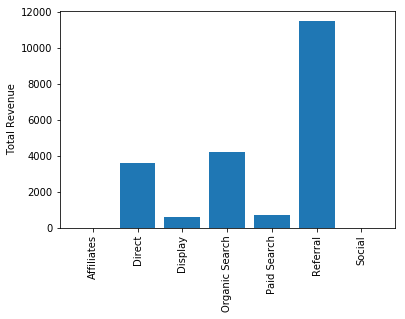

In [95]:
plt.bar(chnlgrp.iloc[:,0],chnlgrp.iloc[:,1])
plt.xticks(rotation='vertical')
plt.ylabel('Total Revenue')

### Referral is likely to have an impact on revenue

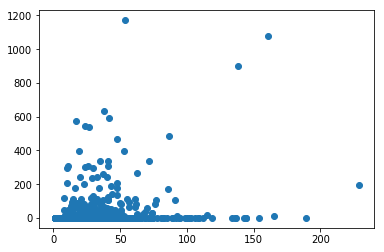

In [96]:
plt.plot(df['totals_hits'],df['totals_transactionRevenue'],'o')

### Not a strong trend with totals_hits and totals_timeOnSite

(0, 1400)

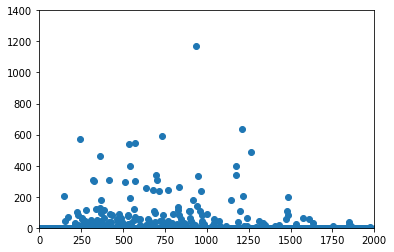

In [97]:
plt.plot(df['totals_timeOnSite'],df['totals_transactionRevenue'],'o')
plt.xlim(0,2000)
plt.ylim(0,1400)

In [98]:
df.groupby('trafficSource')['totals_transactionRevenue'].sum()

trafficSource
(direct)                  16280.67
Partners                      0.00
baidu                         0.00
bing                          0.00
blog.golang.org               0.00
dfa                         593.91
facebook                      0.00
google                     3764.27
qiita.com                     0.00
quora.com                     0.00
reddit.com                    0.00
siliconvalley.about.com       0.00
yahoo                         0.00
youtube                       0.00
Name: totals_transactionRevenue, dtype: float64

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16335 entries, 0 to 19998
Data columns (total 15 columns):
channelGrouping              16335 non-null object
customDimensions             16335 non-null object
isMobile                     16335 non-null bool
country                      16335 non-null object
hasSocialSourceReferral      16335 non-null float64
hitNumber                    16335 non-null int64
localProductPrice            16335 non-null float64
trafficSource                16335 non-null object
visitNumber                  16335 non-null int64
totals_hits                  16335 non-null int64
totals_pageviews             16335 non-null float64
totals_sessionQualityDim     16335 non-null float64
totals_timeOnSite            16335 non-null float64
totals_transactionRevenue    16335 non-null float64
totals_visits                16335 non-null int64
dtypes: bool(1), float64(6), int64(4), object(4)
memory usage: 1.9+ MB


### Generating dummy columns for categorical data

In [100]:
df['isMobile'] = df['isMobile'].astype(int)
categ_columns = ['channelGrouping','customDimensions','country','trafficSource']


In [101]:
final_df = pd.get_dummies(df,columns=categ_columns)
final_df.shape

(16335, 61)

In [102]:
final_df.head()

,isMobile,hasSocialSourceReferral,hitNumber,localProductPrice,visitNumber,totals_hits,totals_pageviews,totals_sessionQualityDim,totals_timeOnSite,totals_transactionRevenue,...,trafficSource_blog.golang.org,trafficSource_dfa,trafficSource_facebook,trafficSource_google,trafficSource_qiita.com,trafficSource_quora.com,trafficSource_reddit.com,trafficSource_siliconvalley.about.com,trafficSource_yahoo,trafficSource_youtube
0,0,0.00,1,14.24,1,1,1.00,1.00,0.00,0.00,...,0,0,0,1,0,0,0,0,0,0
1,0,0.00,2,17.79,6,2,2.00,2.00,28.00,0.00,...,0,0,0,1,0,0,0,0,0,0
2,1,0.00,2,19.42,1,2,2.00,1.00,38.00,0.00,...,0,0,0,0,0,0,0,0,0,0
3,0,0.00,2,20.26,1,2,2.00,1.00,1.00,0.00,...,0,0,0,1,0,0,0,0,0,0
4,0,0.00,2,0.00,1,2,2.00,1.00,52.00,0.00,...,0,0,0,1,0,0,0,0,0,0


In [103]:
X = final_df.drop(columns='totals_transactionRevenue')
y = final_df['totals_transactionRevenue']

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [105]:
X_train_org , X_test_org, y_train, y_test = train_test_split(X,y,random_state=3)

# Supervised Model 1: Linear Regression

In [106]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [112]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train = sc.fit_transform(X_train_org)
X_test = sc.transform(X_test_org)

c:\users\achin\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\achin\appdata\local\programs\python\python36\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
c:\users\achin\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [113]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [114]:
lr.score(X_train,y_train)

0.07601020170348527

In [115]:
lr.score(X_test,y_test)

0.09768119083379945

In [110]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import math

In [116]:
r2_score(y,lr.predict(X))

-2.0419339648427453e+23

## The results are not convincing at all. We should try a different model

# Supervised Model 2: Lasso Regression

In [122]:
from sklearn.linear_model import Lasso
param_grid = {'alpha':[0.01, 0.1, 1, 10, 100]}
lass_grid = GridSearchCV(Lasso(),param_grid=param_grid,cv=5,return_train_score=True)

In [123]:
lass_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [124]:
lass_grid.score(X_train,y_train)

0.0635377955712434

In [129]:
lass_grid.best_score_

0.052372670817936624

In [125]:
lass_grid.score(X_test,y_test)

0.10415015912786851

In [126]:
lass_grid.best_params_

{'alpha': 1}

In [128]:
pd.DataFrame(lass_grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.23,0.10,0.00,0.00,0.01,{'alpha': 0.01},-0.01,0.04,0.05,0.11,...,0.04,0.04,3,0.08,0.08,0.09,0.05,0.09,0.08,0.01
1,0.13,0.05,0.00,0.00,0.10,{'alpha': 0.1},0.00,0.05,0.05,0.10,...,0.04,0.04,2,0.08,0.08,0.09,0.05,0.09,0.08,0.01
2,0.09,0.04,0.00,0.00,1,{'alpha': 1},0.04,0.07,0.04,0.08,...,0.05,0.02,1,0.07,0.07,0.07,0.04,0.07,0.07,0.01
3,0.02,0.00,0.00,0.00,10,{'alpha': 10},-0.00,-0.00,-0.00,-0.00,...,-0.00,0.00,4,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.02,0.00,0.00,0.00,100,{'alpha': 100},-0.00,-0.00,-0.00,-0.00,...,-0.00,0.00,4,0.00,0.00,0.00,0.00,0.00,0.00,0.00


### Scores are still very inefficient

## Applying Unsupervised techniques

# KMeans Clustering

In [130]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [131]:
y_kmeans = kmeans.predict(X)

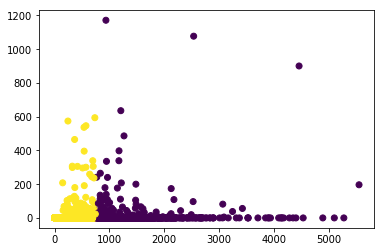

In [132]:
plt.scatter(df['totals_timeOnSite'],df['totals_transactionRevenue'],c=y_kmeans,cmap='viridis')

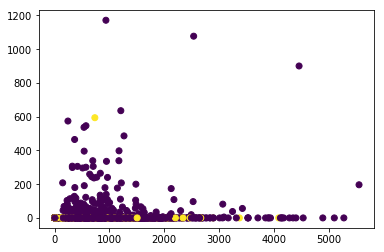

In [134]:
from sklearn.mixture import GaussianMixture

model = GaussianMixture(n_components=2, covariance_type='full')
model.fit(X)

y_gmm = model.predict(X)

plt.scatter(df['totals_timeOnSite'],df['totals_transactionRevenue'],c=y_gmm,cmap='viridis')

# PCA and Linear Regression on transformed data

In [136]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)
pca.n_components_

42

In [137]:
reduced_lreg = LinearRegression()

In [140]:
param_grid = {'fit_intercept':['True']}
grid_red = GridSearchCV(reduced_lreg,param_grid=param_grid,cv=5,return_train_score=True)

In [141]:
grid_red.fit(X_reduced,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'fit_intercept': ['True']}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

In [142]:
grid_red.score(X_reduced,y_train)

0.06156184862684088

In [144]:
grid_red.score(pca.transform(X_test),y_test)

0.09427962631853115

In [147]:
grid_red.best_score_

0.042838263440563226

# PCA and Lasso Regression on transformed data

In [145]:
param_grid = {'alpha':[0.01, 0.1, 1, 10, 100]}
grid_red_lasso = GridSearchCV(Lasso(),param_grid=param_grid,cv=5,return_train_score=True)

In [146]:
grid_red_lasso.fit(X_reduced,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [149]:
grid_red_lasso.best_score_

0.0484518567659896

In [150]:
grid_red_lasso.score(X_reduced,y_train)

0.05348039275773597

In [151]:
grid_red_lasso.score(pca.transform(X_test),y_test)

0.08929416940353163